# Starting off:

### In machine learning what is the difference between an  algorithm and a model?







# Reducing Loss with Gradient Descent





Agenda:

- Logic of Gradient Descent
- Determining the Gradient
- Learning Rate
- Quick Practice
- Batches, Epochs and Iterations
- Google Playground

The goal of fitting a model is to minimize our cost function, also referred to as loss.

Earlier we showed how you can use linear algebra to determine the coefficients that would minimize loss for a linear regression model. This is not possible with all models or data sets.  



Imagine you are trying to fit a linear regression model to predict housing prices. The only probelm is that you have millions of observations and all of your data won't fit in memory.

We learned this morning that linear regression can use the closed-form equation to solve for the coefficients, but how do we solve it when you can't fit all of the data in the matrix?

### Introducing gradient descent



## Marco Polo

Think of **gradient descent** as a game of Marco Polo: 
- You pick a starting point for your weights, then you call out to the data and it gives you some feedback (loss). 
- After you get that feedback you update your position and get more feedback.
- You repeat this process until you get as close as possible.

<img src='./resources/GradientDescentDiagram.svg' width=500 />

### How do we 'compute parameter updates' 

Suppose we had the time and the computing resources to calculate the loss for all possible values of the coefficients. The resulting plot of weights and total loss will always be convex. In other words, the plot will always be bowl-shaped, kind of like this:


<img src='./resources/convex.svg' width=500 />

The **gradient descent algorithm** then calculates the gradient of the loss curve at the starting point. 

The gradient of loss is equal to the derivative (slope) of the curve, and tells you which way is "warmer" or "colder." 

<img src='./resources/GradientDescentNegativeGradient.svg' width=500 />

When there are multiple weights, the gradient is a vector of partial derivatives with respect to the weights.

Since gradient is a vector, so it has both of the following characteristics:

- a direction
- a magnitude

Here is the idea of gradient descent in multiple deminsions. 

<img src='./resources/hilldescent.png' width=500 />



### Partial Derivatives of the cost function

<img src='./resources/gdformula.png' width=500 />



### Gradient vector of the cost function

<img src='./resources/vectorofpartialderivative.png' width=500 />


We understand which direction we want to take a step in, but how big of a step should we take?

<img src='./resources/GradientDescentGradientStep.svg' width=500 />


## Learning Rate

Gradient descent algorithms multiply the gradient by a scalar known as the learning rate (also sometimes called step size) to determine the next point. For example, if the gradient magnitude is 2.5 and the learning rate is 0.01, then the gradient descent algorithm will pick the next point 0.025 away from the previous point.

The size of the step is a ***hyperparameter*** that we can choose. 


### Too Small
<img src='./resources/LearningRateTooSmall.svg' width=500 />


### Too Big

<img src='./resources/LearningRateTooLarge.svg' width=500 />


### Just Right

<img src='./resources/LearningRateJustRight.svg' width=500 />


### What is the appropriate learning rate?

The ideal learning rate in one-dimension is  (the inverse of the second derivative of f(x) at x).

The ideal learning rate for 2 or more dimensions is the inverse of the Hessian (matrix of second partial derivatives).

The story for general convex functions is more complex.

#### It is complex to figure out, so let's just try multiple ones and see which one works best.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [2]:
def gradientDescent(x, y, theta, alpha, m, numEpochs):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numEpochs):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
        print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])

In [3]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [4]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 80)
m, n = np.shape(x)

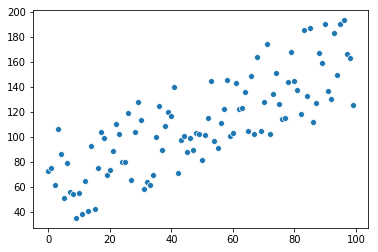

In [5]:
sns.scatterplot(x=x[:,1], y=y)

Iteration 0 | Cost: 878.260592
[1.90595185 1.5342646 ]
Iteration 1 | Cost: 747.082122
[1.92225827 2.13928005]
Iteration 2 | Cost: 692.933704
[1.92358241 1.7506078 ]
Iteration 3 | Cost: 670.546497
[1.93452553 2.00000544]
Iteration 4 | Cost: 661.255156
[1.93929058 1.83968366]
Iteration 5 | Cost: 657.363545
[1.94802121 1.94245223]
Iteration 6 | Cost: 655.698379
[1.95420396 1.87628442]
Iteration 7 | Cost: 654.951240
[1.96202126 1.91859459]
Iteration 8 | Cost: 654.582639
[1.96878749 1.89124856]
Iteration 9 | Cost: 654.370133
[1.97622714 1.90863041]
Iteration 10 | Cost: 654.222004
[1.98323287 1.89729148]
Iteration 11 | Cost: 654.100435
[1.99051574 1.90439485]
Iteration 12 | Cost: 653.989831
[1.99761916 1.89965601]
Iteration 13 | Cost: 653.883765
[2.00483631 1.90252135]
Iteration 14 | Cost: 653.779585
[2.01197894 1.90050389]
Iteration 15 | Cost: 653.676198
[2.01916793 1.90162181]
Iteration 16 | Cost: 653.573153
[2.02632565 1.90072646]
Iteration 17 | Cost: 653.470265
[2.03350196 1.9011239 ]
It

Iteration 712 | Cost: 587.979368
[6.80210529 1.82903213]
Iteration 713 | Cost: 587.893212
[6.80866814 1.82893319]
Iteration 714 | Cost: 587.807078
[6.81523016 1.82883426]
Iteration 715 | Cost: 587.720965
[6.82179134 1.82873534]
Iteration 716 | Cost: 587.634875
[6.8283517  1.82863643]
Iteration 717 | Cost: 587.548806
[6.83491122 1.82853753]
Iteration 718 | Cost: 587.462759
[6.84146991 1.82843865]
Iteration 719 | Cost: 587.376734
[6.84802777 1.82833978]
Iteration 720 | Cost: 587.290731
[6.85458479 1.82824092]
Iteration 721 | Cost: 587.204749
[6.86114098 1.82814208]
Iteration 722 | Cost: 587.118790
[6.86769635 1.82804325]
Iteration 723 | Cost: 587.032852
[6.87425088 1.82794443]
Iteration 724 | Cost: 586.946936
[6.88080458 1.82784562]
Iteration 725 | Cost: 586.861042
[6.88735744 1.82774683]
Iteration 726 | Cost: 586.775169
[6.89390948 1.82764804]
Iteration 727 | Cost: 586.689319
[6.90046068 1.82754927]
Iteration 728 | Cost: 586.603490
[6.90701106 1.82745052]
Iteration 729 | Cost: 586.51768

Iteration 1276 | Cost: 542.698299
[10.374461    1.77517336]
Iteration 1277 | Cost: 542.623631
[10.38057068  1.77508125]
Iteration 1278 | Cost: 542.548981
[10.38667958  1.77498915]
Iteration 1279 | Cost: 542.474350
[10.39278771  1.77489706]
Iteration 1280 | Cost: 542.399739
[10.39889506  1.77480498]
Iteration 1281 | Cost: 542.325146
[10.40500164  1.77471292]
Iteration 1282 | Cost: 542.250572
[10.41110745  1.77462086]
Iteration 1283 | Cost: 542.176017
[10.41721247  1.77452882]
Iteration 1284 | Cost: 542.101481
[10.42331673  1.77443679]
Iteration 1285 | Cost: 542.026964
[10.42942021  1.77434477]
Iteration 1286 | Cost: 541.952466
[10.43552291  1.77425276]
Iteration 1287 | Cost: 541.877986
[10.44162485  1.77416076]
Iteration 1288 | Cost: 541.803526
[10.447726    1.77406878]
Iteration 1289 | Cost: 541.729084
[10.45382639  1.77397681]
Iteration 1290 | Cost: 541.654662
[10.459926    1.77388485]
Iteration 1291 | Cost: 541.580258
[10.46602483  1.7737929 ]
Iteration 1292 | Cost: 541.505873
[10.47

[14.38315228  1.71473616]
Iteration 1962 | Cost: 495.679770
[14.38875344  1.71465171]
Iteration 1963 | Cost: 495.617030
[14.39435388  1.71456728]
Iteration 1964 | Cost: 495.554306
[14.39995361  1.71448286]
Iteration 1965 | Cost: 495.491597
[14.40555263  1.71439844]
Iteration 1966 | Cost: 495.428905
[14.41115094  1.71431404]
Iteration 1967 | Cost: 495.366228
[14.41674854  1.71422965]
Iteration 1968 | Cost: 495.303568
[14.42234543  1.71414526]
Iteration 1969 | Cost: 495.240923
[14.42794162  1.71406089]
Iteration 1970 | Cost: 495.178294
[14.43353709  1.71397653]
Iteration 1971 | Cost: 495.115681
[14.43913185  1.71389218]
Iteration 1972 | Cost: 495.053084
[14.4447259   1.71380784]
Iteration 1973 | Cost: 494.990503
[14.45031924  1.71372352]
Iteration 1974 | Cost: 494.927937
[14.45591187  1.7136392 ]
Iteration 1975 | Cost: 494.865388
[14.46150379  1.71355489]
Iteration 1976 | Cost: 494.802854
[14.46709501  1.71347059]
Iteration 1977 | Cost: 494.740337
[14.47268551  1.71338631]
Iteration 1978

Iteration 2706 | Cost: 453.136889
[18.36513647  1.65470161]
Iteration 2707 | Cost: 453.084942
[18.37023248  1.65462478]
Iteration 2708 | Cost: 453.033008
[18.37532785  1.65454796]
Iteration 2709 | Cost: 452.981087
[18.38042258  1.65447115]
Iteration 2710 | Cost: 452.929179
[18.38551665  1.65439435]
Iteration 2711 | Cost: 452.877285
[18.39061008  1.65431756]
Iteration 2712 | Cost: 452.825403
[18.39570287  1.65424077]
Iteration 2713 | Cost: 452.773535
[18.400795  1.654164]
Iteration 2714 | Cost: 452.721680
[18.4058865   1.65408724]
Iteration 2715 | Cost: 452.669838
[18.41097734  1.65401049]
Iteration 2716 | Cost: 452.618009
[18.41606754  1.65393375]
Iteration 2717 | Cost: 452.566194
[18.4211571   1.65385701]
Iteration 2718 | Cost: 452.514391
[18.42624601  1.65378029]
Iteration 2719 | Cost: 452.462602
[18.43133427  1.65370358]
Iteration 2720 | Cost: 452.410826
[18.43642189  1.65362687]
Iteration 2721 | Cost: 452.359063
[18.44150886  1.65355018]
Iteration 2722 | Cost: 452.307313
[18.446595

Iteration 3299 | Cost: 424.533994
[21.27638569  1.61081004]
Iteration 3300 | Cost: 424.489304
[21.28111239  1.61073878]
Iteration 3301 | Cost: 424.444624
[21.2858385   1.61066752]
Iteration 3302 | Cost: 424.399956
[21.29056401  1.61059628]
Iteration 3303 | Cost: 424.355299
[21.29528892  1.61052504]
Iteration 3304 | Cost: 424.310654
[21.30001323  1.61045382]
Iteration 3305 | Cost: 424.266019
[21.30473694  1.6103826 ]
Iteration 3306 | Cost: 424.221396
[21.30946005  1.61031139]
Iteration 3307 | Cost: 424.176785
[21.31418256  1.61024019]
Iteration 3308 | Cost: 424.132185
[21.31890447  1.610169  ]
Iteration 3309 | Cost: 424.087596
[21.32362579  1.61009782]
Iteration 3310 | Cost: 424.043018
[21.3283465   1.61002665]
Iteration 3311 | Cost: 423.998452
[21.33306662  1.60995549]
Iteration 3312 | Cost: 423.953897
[21.33778614  1.60988433]
Iteration 3313 | Cost: 423.909353
[21.34250505  1.60981319]
Iteration 3314 | Cost: 423.864821
[21.34722337  1.60974205]
Iteration 3315 | Cost: 423.820300
[21.35

[24.27351637  1.56562367]
Iteration 3961 | Cost: 397.296421
[24.27786287  1.56555814]
Iteration 3962 | Cost: 397.258640
[24.28220883  1.56549262]
Iteration 3963 | Cost: 397.220869
[24.28655423  1.56542711]
Iteration 3964 | Cost: 397.183107
[24.29089908  1.5653616 ]
Iteration 3965 | Cost: 397.145355
[24.29524338  1.5652961 ]
Iteration 3966 | Cost: 397.107613
[24.29958713  1.56523062]
Iteration 3967 | Cost: 397.069880
[24.30393033  1.56516514]
Iteration 3968 | Cost: 397.032156
[24.30827297  1.56509966]
Iteration 3969 | Cost: 396.994443
[24.31261507  1.5650342 ]
Iteration 3970 | Cost: 396.956738
[24.31695661  1.56496874]
Iteration 3971 | Cost: 396.919044
[24.32129761  1.5649033 ]
Iteration 3972 | Cost: 396.881359
[24.32563805  1.56483786]
Iteration 3973 | Cost: 396.843683
[24.32997794  1.56477243]
Iteration 3974 | Cost: 396.806017
[24.33431728  1.56470701]
Iteration 3975 | Cost: 396.768361
[24.33865608  1.56464159]
Iteration 3976 | Cost: 396.730714
[24.34299432  1.56457619]
Iteration 3977

[27.38331093  1.51873873]
Iteration 4711 | Cost: 371.490428
[27.38726294  1.51867914]
Iteration 4712 | Cost: 371.459194
[27.39121444  1.51861957]
Iteration 4713 | Cost: 371.427968
[27.39516545  1.51856   ]
Iteration 4714 | Cost: 371.396750
[27.39911596  1.51850044]
Iteration 4715 | Cost: 371.365540
[27.40306596  1.51844089]
Iteration 4716 | Cost: 371.334338
[27.40701547  1.51838134]
Iteration 4717 | Cost: 371.303143
[27.41096447  1.51832181]
Iteration 4718 | Cost: 371.271957
[27.41491297  1.51826228]
Iteration 4719 | Cost: 371.240779
[27.41886097  1.51820275]
Iteration 4720 | Cost: 371.209608
[27.42280847  1.51814324]
Iteration 4721 | Cost: 371.178445
[27.42675547  1.51808373]
Iteration 4722 | Cost: 371.147290
[27.43070197  1.51802423]
Iteration 4723 | Cost: 371.116143
[27.43464797  1.51796474]
Iteration 4724 | Cost: 371.085004
[27.43859346  1.51790526]
Iteration 4725 | Cost: 371.053873
[27.44253846  1.51784578]
Iteration 4726 | Cost: 371.022750
[27.44648296  1.51778631]
Iteration 4727

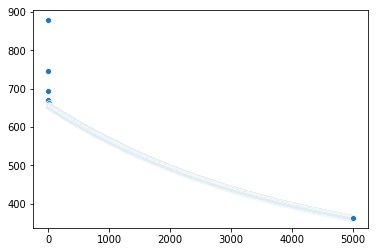

In [8]:
numEpochs= 5000
alpha = 0.0005
theta = np.array([1.90595185,1.5342646])
gradientDescent(x, y, theta, alpha, m, numEpochs)

### Google's Version
https://developers.google.com/machine-learning/crash-course/fitter/graph



#### Adaptive Learning Rates

The performance of the model on the training dataset can be monitored by the learning algorithm and the learning rate can be adjusted in response.

This is called an **adaptive learning rate**.

Perhaps the simplest implementation is to make the learning rate smaller once the performance of the model plateaus, such as by decreasing the learning rate by a factor of two or an order of magnitude.

A function that determines the learning rate at each step is called the *learning schedule*.

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

# Applying Gradient Descent

 *Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

When doing GD it is important to scale your features to a similiar scale or else it will take the algorithm longer to converge. 

<img src='./resources/scalecontour.png' width=500/>

## Batches

In gradient descent, a **batch** is the total number of examples you use to calculate the gradient in a single iteration. So far, we've assumed that the batch has been the entire data set. 

### Batch Gradient Descent

* This formula involves caluclations over the full training set X, at each Gradient Descent step. 
* Terribly slow on large number of observations, but scales well with the number of features.
* When training a Linear Regression model with hundreds of thousands of features Gradient Descent is much faster than using linear algebra and the Normal Equation.


### Stochastic Gradient Descent (SGD)

- Picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

- Algorithm is much faster given it has very little data to manipulate. 

- Can be used as an out-of-core algorithm, since it only needs one data observation at a time

When the cost function is very irregular, SGD has a better chance of of finding the global minimum than BGD.
This could be bad because the algorithm will never settle at a minimum.  
One way to avoid this is by reducing the learning rate (step size) as the algorithm progresses. 



### Mini-batch Gradient Descent

At each step, computing the gradietns is based on a small random set of instaces called *mini-batches*.

Mini-batch GD will be less erratic than SGD because it is training on a multiple data instances. 

Faster than Batch GD.

Harder to escape local minima than SGD.

### Epochs

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
One epoch is when an ENTIRE dataset is passed through the model one time.


#### How many epochs should we have?

Train each model along a sufficient number of epochs to see the training loss become stuck in a minimum. 

Many algorithms allow you to set up a parameter so that whenever you see the loss not improve after a number of epochs, it stops.  

### Iterations

**Iterations** is the number of batches needed to complete one epoch.

Let’s say we have 2000 training examples that we are going to use. We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

### Question:

Why would you use more than 1 epoch when fitting your model?

### Comparison of Types of Gradient Descent

<img src='./resources/comparegdtypes.png' width=600/>

<img src='./resources/algotable.png' width=600/>

<img src='./resources/albotable2.png' width=600/>

https://github.com/ageron/handson-ml.git

https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise